In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append('/Users/lynnej/otherRepos/survey_strategy_wp/tools/')
fieldfile = '/Users/lynnej/otherRepos/survey_strategy_wp/tools/field_list.csv'
from lynnesim import LynneSim

In [3]:
wfd_visit_distrib = {'u': 56, 'g': 80, 'r': 184, 'i': 184, 'z': 160, 'y':160}

Assuming a total number of visits 2600000 and that we will use 0.930000 of them:
The number of visits available for use is 2418000 (2.42M)
Defined survey region WFD
  with 2455 fields in the selected footprint
  with 980 visits per field
  with filter balance: {'u': 0.06796116504854369, 'g': 0.0970873786407767, 'r': 0.22330097087378642, 'i': 0.22330097087378642, 'z': 0.1941747572815534, 'y': 0.1941747572815534}
Defined survey region GalacticPlane
  with 5292 fields in the selected footprint
  with 90 visits per field
  with filter balance: {'u': 0.16666666666666666, 'g': 0.16666666666666666, 'r': 0.16666666666666666, 'i': 0.16666666666666666, 'z': 0.16666666666666666, 'y': 0.16666666666666666}
Defined survey region GalacticPlane
  with 5292 fields in the selected footprint
  with 90 visits per field
  with filter balance: {'u': 0.16666666666666666, 'g': 0.16666666666666666, 'r': 0.16666666666666666, 'i': 0.16666666666666666, 'z': 0.16666666666666666, 'y': 0.16666666666666666}
Defined s

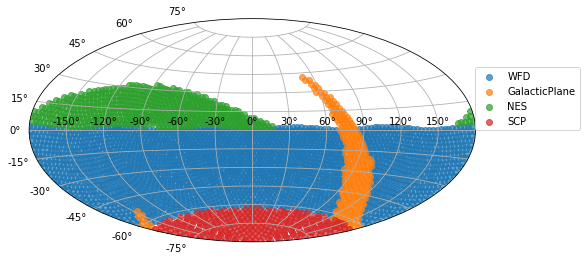

In [4]:
# Old / Standard footprint
totalVis = 2600000
percentTotal = 0.93
old = LynneSim(totalNvis=totalVis, percentTotal=percentTotal, fieldfile=fieldfile)
old.define_survey_region('WFD', NvisitsPerField=980, limits={'dec':[-62.5,2.5]}, fractions=wfd_visit_distrib)
old.regions['WFD'] = old.regions['WFD'].query('abs(gb) > (10 - (10 * abs(gl))/90)')
old.define_survey_region('GalacticPlane', NvisitsPerField=90, limits={'dec':[-90, 90]})
old.define_survey_region('GalacticPlane', NvisitsPerField=90, limits={'dec':[-90, 90]})
old.regions['GalacticPlane'] = old.regions['GalacticPlane'].query('abs(gb) < (10 - (10 * abs(gl))/90)')
old.define_survey_region('NES', NvisitsPerField=255, fractions={'u':0, 'g': 1, 'r': 1, 'i': 1, 'z': 1, 'y': 0},
                          limits={'dec':[2.5, 90], 'eb':[-20, 10]})
old.define_survey_region('SCP', NvisitsPerField=90,
                          limits={'dec':[-90, -63], 'gb':[-90, 90]})
fig = old.plot_sky_map()

In [5]:
old.distribute_visits()

Assigned 2234400 visits to WFD (980 visits/field * 2280 fields)
Assigned 20970 visits to GalacticPlane (90 visits/field * 233 fields)
Assigned 134895 visits to NES (255 visits/field * 529 fields)
Assigned 26190 visits to SCP (90 visits/field * 291 fields)
Assigned 2416455 visits based on NvisitsPerField values to each of ['WFD', 'GalacticPlane', 'NES', 'SCP']
There are no fields requiring additional/unassigned number of visits.
This leaves about 1545 visits out of candidate 2418000 remaining.
 (or that these surveys required 0.93 of all the original visits.


{'WFD': 980, 'GalacticPlane': 90, 'NES': 255, 'SCP': 90}
Defined survey region _all_nvisits
  with 5292 fields in the selected footprint
  (will decide total number of visits per field later)
  with filter balance: {'u': 0.16666666666666666, 'g': 0.16666666666666666, 'r': 0.16666666666666666, 'i': 0.16666666666666666, 'z': 0.16666666666666666, 'y': 0.16666666666666666}
WFD
GalacticPlane
NES
SCP


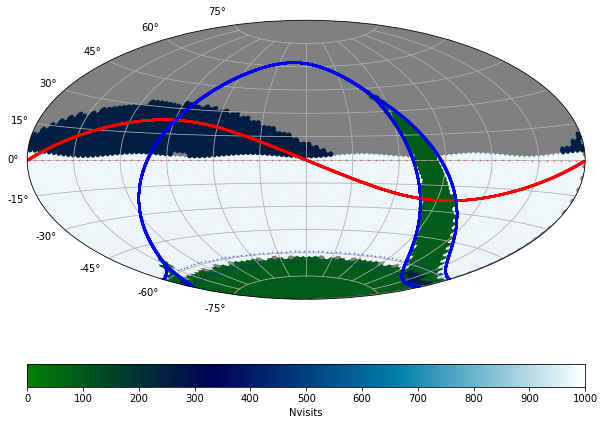

In [26]:
print(old.NvisitsPerField)
fig = old.fancy_plot_Nvisits(cmap='ocean')

Assuming a total number of visits 2600000 and that we will use 0.930000 of them:
The number of visits available for use is 2418000 (2.42M)
Defined survey region WFD
  with 1923 fields in the selected footprint
  with 839 visits per field
  with filter balance: {'u': 0.06796116504854369, 'g': 0.0970873786407767, 'r': 0.22330097087378642, 'i': 0.22330097087378642, 'z': 0.1941747572815534, 'y': 0.1941747572815534}
Defined survey region GalacticPlaneCenter
  with 391 fields in the selected footprint
  with 750 visits per field
  with filter balance: {'u': 0.16666666666666666, 'g': 0.16666666666666666, 'r': 0.16666666666666666, 'i': 0.16666666666666666, 'z': 0.16666666666666666, 'y': 0.16666666666666666}
Defined survey region NES
  with 537 fields in the selected footprint
  with 255 visits per field
  with filter balance: {'u': 0.0, 'g': 0.2, 'r': 0.4, 'i': 0.4, 'z': 0.0, 'y': 0.0}
Defined survey region SCP
  with 126 fields in the selected footprint
  with 200 visits per field
  with filt

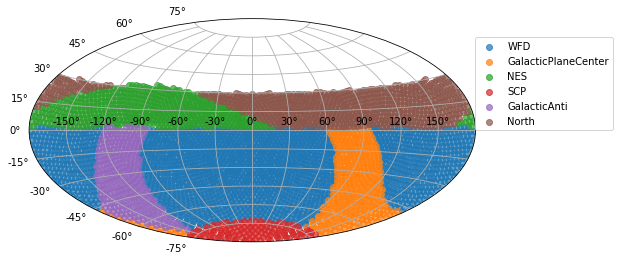

In [19]:
# New footprint A (not so far north)
newA = LynneSim(totalNvis=totalVis, percentTotal=percentTotal, fieldfile=fieldfile)
newA.define_survey_region('WFD', NvisitsPerField=839, limits={'dec':[-72.25,2.25], 'gb':[15.01, -15.01]},
                        fractions=wfd_visit_distrib)
newA.define_survey_region('GalacticPlaneCenter', NvisitsPerField=750,
                           limits={'gb':[-15.0, 15.0], 'gl':[-70.0, 90.0],'dec':[-72.25, 2.25]})
newA.define_survey_region('NES', NvisitsPerField=255, 
                          fractions={'u': 0, 'g': 0.5, 'r': 1, 'i': 1, 'z': 0, 'y': 0},
                          limits={'dec':[2.25, 90], 'eb':[-20, 10]})
newA.define_survey_region('SCP', NvisitsPerField=200,
                          limits={'dec':[-90, -72.5]})
newA.define_survey_region('GalacticAnti', NvisitsPerField=825,
                          limits={'gb':[-15.0, 15.0], 'gl':[90.0, -70.0], 'dec':[-72.25, 2.25]})
newA.define_survey_region('North', NvisitsPerField=None,
                          limits={'dec':[2.25, 30], 'eb':[10.2, 90]})
fig = newA.plot_sky_map()

In [20]:
newA.distribute_visits()

Assigned 1613397 visits to WFD (839 visits/field * 1923 fields)
Assigned 293250 visits to GalacticPlaneCenter (750 visits/field * 391 fields)
Assigned 136935 visits to NES (255 visits/field * 537 fields)
Assigned 25200 visits to SCP (200 visits/field * 126 fields)
Assigned 252450 visits to GalacticAnti (825 visits/field * 306 fields)
Assigned 2321232 visits based on NvisitsPerField values to each of ['WFD', 'GalacticPlaneCenter', 'NES', 'SCP', 'GalacticAnti']
Assigned 96186 visits based on even split between 697 fields in regions ['North'] (138 per field)
This leaves about 582 visits out of candidate 2418000 remaining.
 (or that these surveys required 0.93 of all the original visits.


{'WFD': 839, 'GalacticPlaneCenter': 750, 'NES': 255, 'SCP': 200, 'GalacticAnti': 825, 'North': 138}
Defined survey region _all_nvisits
  with 5292 fields in the selected footprint
  (will decide total number of visits per field later)
  with filter balance: {'u': 0.16666666666666666, 'g': 0.16666666666666666, 'r': 0.16666666666666666, 'i': 0.16666666666666666, 'z': 0.16666666666666666, 'y': 0.16666666666666666}
WFD
GalacticPlaneCenter
NES
SCP
GalacticAnti
North


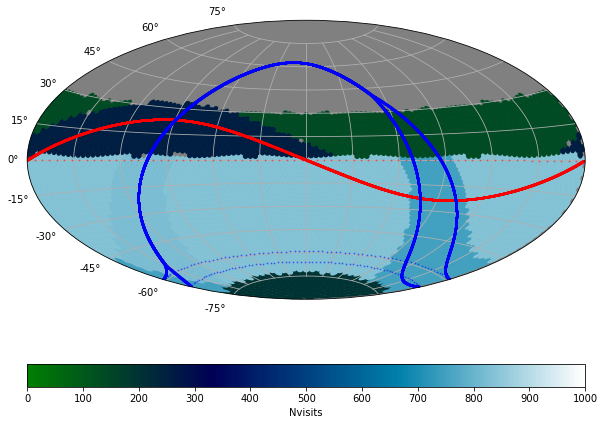

In [25]:
print(newA.NvisitsPerField)
fig = newA.fancy_plot_Nvisits(cmap='ocean')

Assuming a total number of visits 2600000 and that we will use 0.930000 of them:
The number of visits available for use is 2418000 (2.42M)
Defined survey region WFD
  with 2286 fields in the selected footprint
  with 830 visits per field
  with filter balance: {'u': 0.06796116504854369, 'g': 0.0970873786407767, 'r': 0.22330097087378642, 'i': 0.22330097087378642, 'z': 0.1941747572815534, 'y': 0.1941747572815534}
Defined survey region GalacticPlaneCenter
  with 435 fields in the selected footprint
  with 650 visits per field
  with filter balance: {'u': 0.16666666666666666, 'g': 0.16666666666666666, 'r': 0.16666666666666666, 'i': 0.16666666666666666, 'z': 0.16666666666666666, 'y': 0.16666666666666666}
Defined survey region NES
  with 293 fields in the selected footprint
  with 255 visits per field
  with filter balance: {'u': 0.0, 'g': 0.2, 'r': 0.4, 'i': 0.4, 'z': 0.0, 'y': 0.0}
Defined survey region SCP
  with 126 fields in the selected footprint
  with 200 visits per field
  with filt

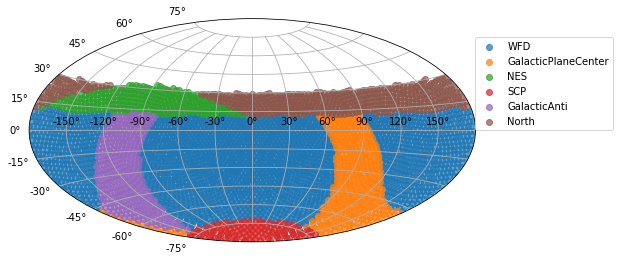

In [22]:
# New footprint DESC preferred?
newB = LynneSim(totalNvis=totalVis, percentTotal=percentTotal, fieldfile=fieldfile)

newB.define_survey_region('WFD', NvisitsPerField=830, limits={'dec':[-72.25,12.25], 'gb':[15.01, -15.01]},
                         fractions=wfd_visit_distrib)
newB.define_survey_region('GalacticPlaneCenter', NvisitsPerField=650,
                           limits={'gb':[-15.0, 15.0], 'gl':[-70.0, 90.0],'dec':[-72.25, 12.25]})
newB.define_survey_region('NES', NvisitsPerField=255, fractions={'u': 0, 'g': 0.5, 'r': 1, 'i': 1, 'z': 0, 'y': 0},
                          limits={'dec':[12.25, 90], 'eb':[-15, 10]})
newB.define_survey_region('SCP', NvisitsPerField=200,
                          limits={'dec':[-90, -72.5]})
newB.define_survey_region('GalacticAnti', NvisitsPerField=100,
                          limits={'gb':[-15.0, 15.0], 'gl':[90.0, -70.0], 'dec':[-72.25, 12.25]})
newB.define_survey_region('North', NvisitsPerField=None,
                          limits={'dec':[12.25, 30], 'eb':[10.2, 90]})
fig = newB.plot_sky_map()

In [23]:
newB.distribute_visits()

Assigned 1897380 visits to WFD (830 visits/field * 2286 fields)
Assigned 282750 visits to GalacticPlaneCenter (650 visits/field * 435 fields)
Assigned 74715 visits to NES (255 visits/field * 293 fields)
Assigned 25200 visits to SCP (200 visits/field * 126 fields)
Assigned 34900 visits to GalacticAnti (100 visits/field * 349 fields)
Assigned 2314945 visits based on NvisitsPerField values to each of ['WFD', 'GalacticPlaneCenter', 'NES', 'SCP', 'GalacticAnti']
Assigned 102672 visits based on even split between 496 fields in regions ['North'] (207 per field)
This leaves about 383 visits out of candidate 2418000 remaining.
 (or that these surveys required 0.93 of all the original visits.


{'WFD': 830, 'GalacticPlaneCenter': 650, 'NES': 255, 'SCP': 200, 'GalacticAnti': 100, 'North': 207}
Defined survey region _all_nvisits
  with 5292 fields in the selected footprint
  (will decide total number of visits per field later)
  with filter balance: {'u': 0.16666666666666666, 'g': 0.16666666666666666, 'r': 0.16666666666666666, 'i': 0.16666666666666666, 'z': 0.16666666666666666, 'y': 0.16666666666666666}
WFD
GalacticPlaneCenter
NES
SCP
GalacticAnti
North


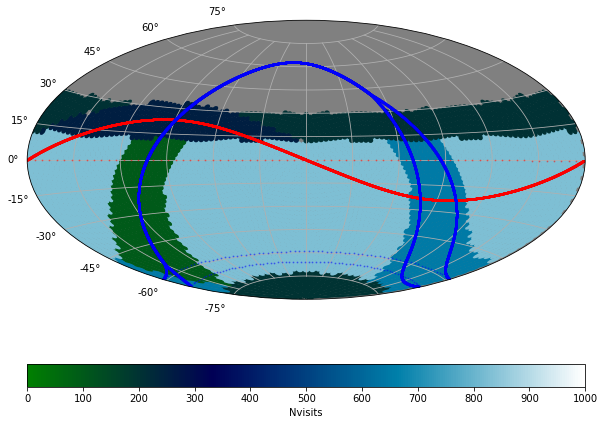

In [27]:
print(newB.NvisitsPerField)
fig = newB.fancy_plot_Nvisits(cmap='ocean')